# M=10 ，N=10, K=10

In [1]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/user/Desktop/IWF-DNN/data2DComplex


/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
DateLocation='MIMO50000_4_4_10.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['X']
Ydata=Data['Y']
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
X = np.column_stack((np.real(Xdata), np.imag(Xdata)))
Y = np.column_stack((np.real(Ydata), np.imag(Ydata)))
x_train, x_val ,y_train, y_val= train_test_split(X, Y, test_size=0.3)

In [24]:
y_train[1,:]


array([ 2.73210749e-03,  3.89357618e-03,  2.54280978e-03,  4.26530673e-04,
        3.89357618e-03,  5.78653176e-03,  3.64292992e-03,  5.13484376e-04,
        2.54280978e-03,  3.64292992e-03,  2.36837513e-03,  3.89582661e-04,
        4.26530673e-04,  5.13484376e-04,  3.89582661e-04,  1.04790712e-04,
        1.50248136e-02,  2.41149937e-02,  4.33841620e-02,  6.56745717e-02,
        2.41149937e-02,  3.89418380e-02,  7.27006459e-02,  1.02752403e-01,
        4.33841620e-02,  7.27006459e-02,  1.65154156e-01,  1.55049632e-01,
        6.56745717e-02,  1.02752403e-01,  1.55049632e-01,  3.17371436e-01,
        3.98811463e-02, -1.24617076e-02, -6.14866746e-02, -1.14533030e-01,
       -1.24617076e-02,  2.45927375e-01, -7.12488385e-02,  2.23706304e-01,
       -6.14866746e-02, -7.12488385e-02,  1.28614658e-01,  1.06350006e-01,
       -1.14533030e-01,  2.23706304e-01,  1.06350006e-01,  4.74830223e-01,
        1.50037285e-01,  6.84125992e-02,  1.39144084e-01,  4.30741228e-01,
        6.84125992e-02,  

In [15]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
x_val = scaler.transform(x_val)  
# Xtest = scaler.transform(Xtest)  

In [ ]:
tf.reshape(y_prey[i,:],[M,N,K])      

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor
MNK10Model=MLPRegressor(activation='relu', learning_rate_init=0.001 ,solver='sgd',max_iter=100
                    ,alpha=1e-5,hidden_layer_sizes=(200,80,80), random_state=1)
MNK10Model.fit(x_train, y_train)

/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 80, 80), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [19]:
import time
def test(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, n_hidden_4 = 40,binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights4(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, n_output)
    pred = multilayer_perceptron4(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return y_pred

def DABtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    X.real[:,:]=XX[:,0:dim]
    X.imag[:,:]=XX[:,dim:2*dim]
    return X
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[K,M,N])
        pnn=np.reshape(y_pred[i,:],[K,M,N])      
        for j in range(K):
            if j==i:
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+H[j,:,:] * pnn[j,:,:] * np.transpose(H[j,:,:]))))
            else:
                pnn[j,:,:]=pnn[j,:,:]+pnn[j-1,:,:]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+H[j,:,:] * pnn[j,:,:] * np.transpose(H[j,:,:]))/np.linalg.det((np.eye(M)+H[j,:,:] * pnn[j-1,:,:] * np.transpose(H[j,:,:])))))
        sum_rate.append(rate_nn)
    return sum_rate



def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))
    
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0

def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
    plt.xlim([0, 1])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0

def testPerformance(model_location, save_name, n_input, n_output,dim, M, N, K,samples):
    ypred=test(Xtest, model_location, save_name+'%s'%('test'), n_input,n_output, binary=0)
    trainPred=test(x_train, model_location, save_name+"%s"%('train'), n_input,n_output, binary=0)
    valPred=test(x_val, model_location, save_name+"%s"%('val'), n_input,n_output, binary=0)
    x=DABtoComplex(X,dim)
    xtest=DABtoComplex(Xtest,dim)
    ytest=DABtoComplex(Ytest,dim)
    ypred=DABtoComplex(ypred,dim)

    # train & val
    xtrain=DABtoComplex(x_train,dim)
    ytrain=DABtoComplex(y_train,dim)
    trainPred=DABtoComplex(trainPred,dim)
    xval=DABtoComplex(x_val,dim)
    yval=DABtoComplex(y_val,dim)
    valPred=DABtoComplex(valPred,dim)

    # test
    nnsumRate=obj_sum_rate(xtest, ypred, M, N, K, samples)
    IWFsumRate=obj_sum_rate(xtest, ytest, M, N, K, samples)
    #trian
    nnSRTrain=obj_sum_rate(xtrain, trainPred, M, N, K, samples)
    IWFSRTrain=obj_sum_rate(xtrain, ytrain, M, N, K, samples)
    # validation
    IWFSRVal=obj_sum_rate(xval, yval, M, N, K, samples)
    nnSRVal=obj_sum_rate(xval, valPred, M, N, K, samples)

    plt.figure(1)
    plt.subplot(311)
    plt.title('CDF AnalysisTest')
    CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
    plt.subplot(312)
    plt.title('CDF Analysis_Train')
    CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
    plt.subplot(313)
    plt.title('CDF Analysis_val')
    CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')
    
    plt.figure(2)
    plt.subplot(211)
    plt.title('Hist AnalysisTest')
    histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
    plt.subplot(212)
    plt.title('Hist Analysis_Train')
    histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
    
    performance(IWFsumRate, nnsumRate, samples)
    performance(IWFSRTrain, nnSRTrain, samples)
    return 0
    

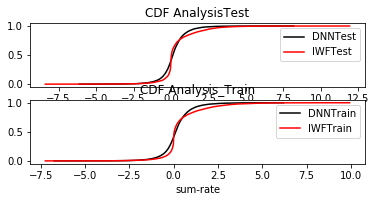

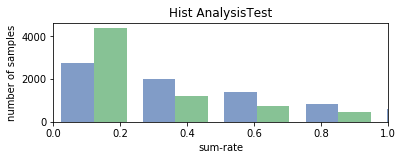

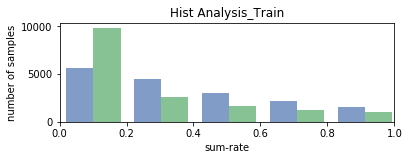

Sum-rate: IWF: 0.360, DNN: 0.162
Ratio: DNN: 45.076%

Sum-rate: IWF: 0.379, DNN: 0.153
Ratio: DNN: 40.196%



0

In [20]:
# M=4 N=4,K=10 and SumPower=50(low)
# NN_y_train_pre_proba=T6_NN.predict_proba(T6_X_train)
trainPred=MNK10Model.predict(x_train)

# NN_y_test_pre_proba=T6_NN.predict_proba(T6_X_test)
valPred=MNK10Model.predict(x_val)
D=12
# x=DABtoComplex(X,12)
# xtest=DABtoComplex(Xtest,12)
# ytest=DABtoComplex(Ytest,12)
# ypred=DABtoComplex(ypred,12)

# train & val
xtrain=DABtoComplex(x_train,12)
ytrain=DABtoComplex(y_train,12)
trainPred=DABtoComplex(trainPred,12)
xval=DABtoComplex(x_val,12)
yval=DABtoComplex(y_val,12)
valPred=DABtoComplex(valPred,12)

# test
# nnsumRate=obj_sum_rate(xtest, ypred,2,2,3, 10000)
# IWFsumRate=obj_sum_rate(xtest, ytest,2,2,3, 10000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,2,2,3, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,2,2,3, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,2,2,3, 15000)
nnSRVal=obj_sum_rate(xval, valPred,2,2,3, 15000)

# print(len(nnsumRate))
# print(len(IWFsumRate))
plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(211)
plt.title('Hist AnalysisTest')
histPlot(nnSRVal,IWFSRVal, ['DNNTest', 'IWFTest'])
plt.subplot(212)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])

performance(IWFSRVal, nnSRVal, 15000)
performance(IWFSRTrain, nnSRTrain, 35000)

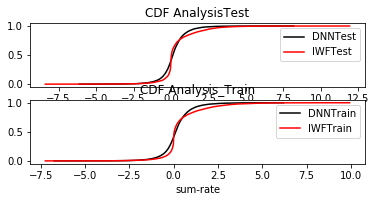

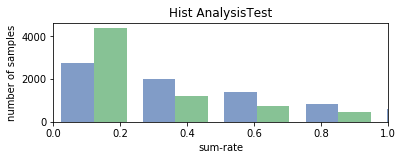

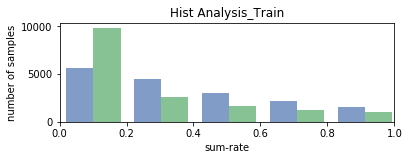

Sum-rate: IWF: 0.360, DNN: 0.162
Ratio: DNN: 45.076%

Sum-rate: IWF: 0.379, DNN: 0.153
Ratio: DNN: 40.196%



0

In [21]:
# M=10,N=10,K=10 and SumPower=10(low)
# NN_y_train_pre_proba=T6_NN.predict_proba(T6_X_train)
trainPred=MNK10Model.predict(x_train)

# NN_y_test_pre_proba=T6_NN.predict_proba(T6_X_test)
valPred=MNK10Model.predict(x_val)
D=12
# x=DABtoComplex(X,12)
# xtest=DABtoComplex(Xtest,12)
# ytest=DABtoComplex(Ytest,12)
# ypred=DABtoComplex(ypred,12)

# train & val
xtrain=DABtoComplex(x_train,12)
ytrain=DABtoComplex(y_train,12)
trainPred=DABtoComplex(trainPred,12)
xval=DABtoComplex(x_val,12)
yval=DABtoComplex(y_val,12)
valPred=DABtoComplex(valPred,12)

# test
# nnsumRate=obj_sum_rate(xtest, ypred,2,2,3, 10000)
# IWFsumRate=obj_sum_rate(xtest, ytest,2,2,3, 10000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,2,2,3, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,2,2,3, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,2,2,3, 15000)
nnSRVal=obj_sum_rate(xval, valPred,2,2,3, 15000)

# print(len(nnsumRate))
# print(len(IWFsumRate))
plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(211)
plt.title('Hist AnalysisTest')
histPlot(nnSRVal,IWFSRVal, ['DNNTest', 'IWFTest'])
plt.subplot(212)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])

performance(IWFSRVal, nnSRVal, 15000)
performance(IWFSRTrain, nnSRTrain, 35000)